In [5]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

In [10]:
filename = "L_bracket_stress.h5"
def load_all_samples(filename):
    all_data = []
    
    with h5py.File(filename, 'r') as hf:
        # Sort keys to ensure numerical order (sample_0, sample_1, ...)
        # splitting by '_' and taking the last part ensures 'sample_10' comes after 'sample_2'
        keys = sorted(hf.keys(), key=lambda x: int(x.split('_')[1]))
        
        print(f"Found {len(keys)} samples. Loading...")
        
        for key in keys:
            group = hf[key]
            
            # Create a dictionary for this sample
            sample = {
                'points': group['points'][:],  # (N, 2)
                'stress': group['stress'][:],  # (N, 1)
                'corner': group['corner'][:]   # (2,)
            }
            all_data.append(sample)
            
    return all_data

# Load everything
dataset = load_all_samples("L_bracket_stress.h5")

# Verification
print(f"\nLoaded {len(dataset)} samples successfully.")
print(f"Sample 0 node count: {dataset[0]['points'].shape[0]}")
print(f"Sample 1 node count: {dataset[1]['points'].shape[0]} (Note: N varies per mesh)")

Found 2000 samples. Loading...

Loaded 2000 samples successfully.
Sample 0 node count: 376
Sample 1 node count: 400 (Note: N varies per mesh)



Plotting extracted data...


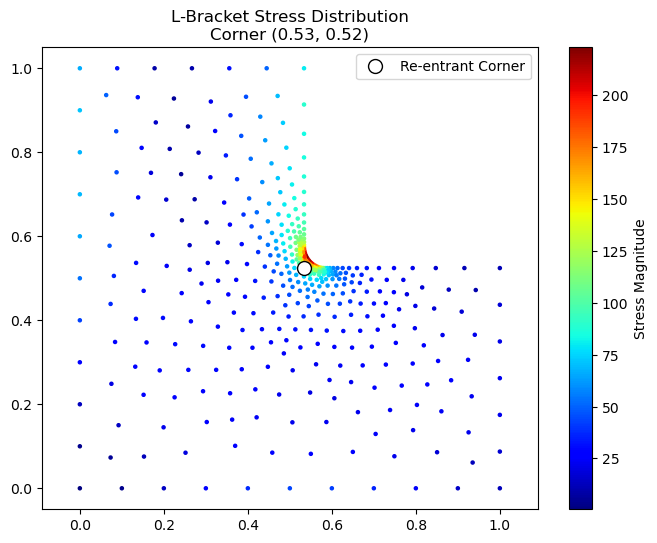

In [9]:


# -----------------
# Verification Visualization
# -----------------
print("\nPlotting extracted data...")
plt.figure(figsize=(8, 6))

plt.scatter(points[:, 0], points[:, 1], c=stress.flatten(), cmap='jet', s=5)
plt.colorbar(label='Stress Magnitude')
plt.plot(corner[0], corner[1], 'wo', markeredgecolor='k', markersize=10, label="Re-entrant Corner")
plt.title(f"L-Bracket Stress Distribution\nCorner ({corner[0]:.2f}, {corner[1]:.2f})")
plt.axis('equal')   
plt.legend()
plt.show()

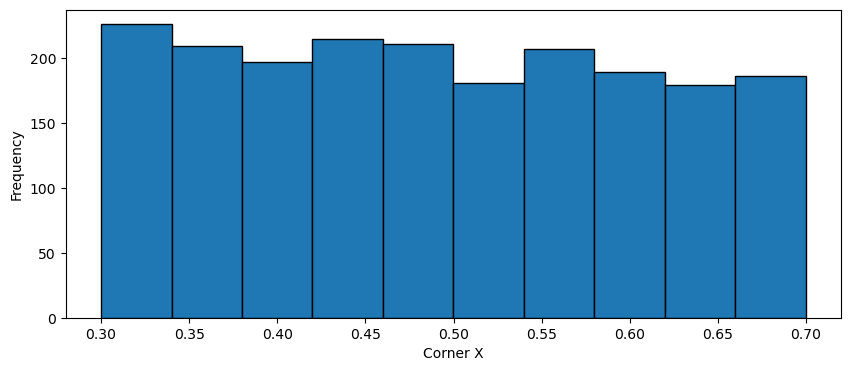

In [11]:
#histogram of corner locations
corners = np.array([sample['corner'] for sample in dataset])
plt.figure(figsize=(10,4))
plt.hist(corners[:, 0], bins=10, edgecolor='black')
plt.xlabel('Corner X')
plt.ylabel('Frequency')
plt.show()